## Многослойная нейронная сеть (MLP) для классификации нелинейных данных


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Генерация обучающих данных

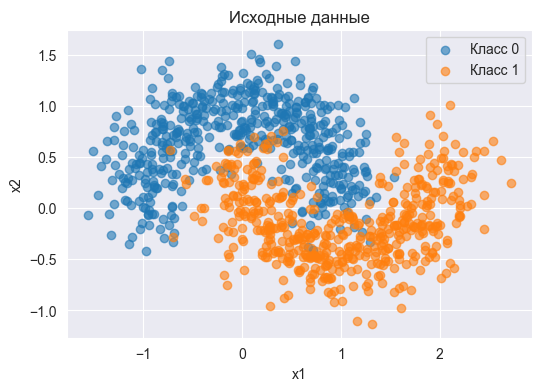

In [10]:
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

X, y = make_moons(n_samples=1000, noise=0.25, random_state=SEED)

plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Класс 0", alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Класс 1", alpha=0.6)
plt.title("Исходные данные")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Подготовка данных

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

Архитектура MLP

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.model(x)

Обучение модели

In [6]:
model = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
loss_history = []

for epoch in range(epochs):
    model.train()

    logits = model(X_train)
    loss = criterion(logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Эпоха {epoch:4d}/{epochs}, loss = {loss.item():.4f}")

Эпоха    0/1000, loss = 0.8067
Эпоха  100/1000, loss = 0.3588
Эпоха  200/1000, loss = 0.3342
Эпоха  300/1000, loss = 0.3293
Эпоха  400/1000, loss = 0.3254
Эпоха  500/1000, loss = 0.3248
Эпоха  600/1000, loss = 0.3245
Эпоха  700/1000, loss = 0.3239
Эпоха  800/1000, loss = 0.3227
Эпоха  900/1000, loss = 0.3218


Анализ процесса обучения

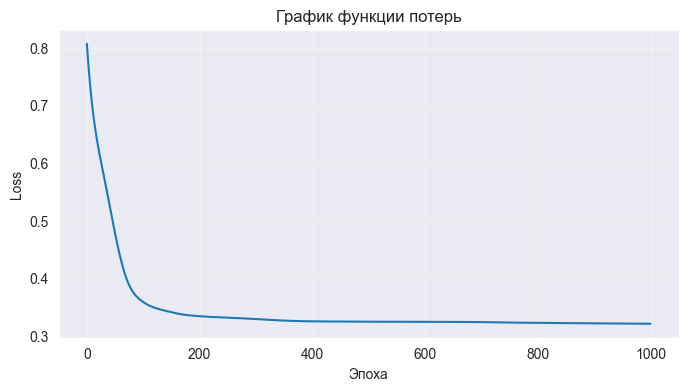

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title("График функции потерь")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.show()

Оценка точности модели

In [8]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    probs = torch.sigmoid(logits)
    preds = (probs >= 0.5).float()

accuracy = accuracy_score(y_test, preds)
print(f"Accuracy на тестовой выборке: {accuracy:.4f}")

Accuracy на тестовой выборке: 0.9150


Визуализация границы решений

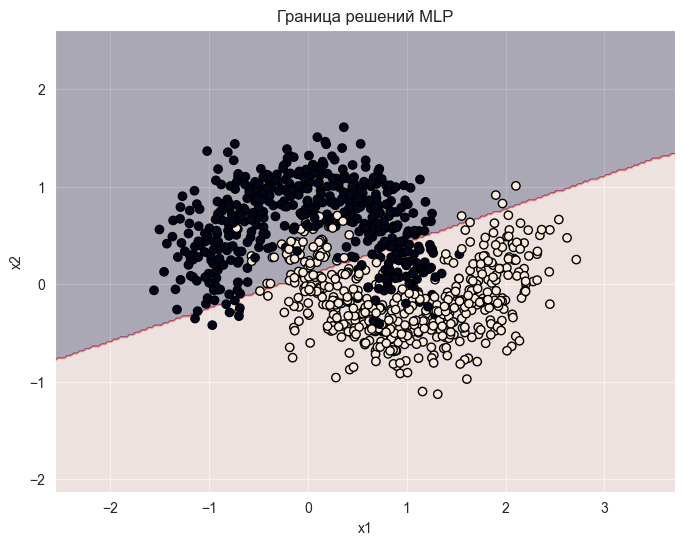

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
grid_tensor = torch.FloatTensor(grid_scaled)

with torch.no_grad():
    Z = torch.sigmoid(model(grid_tensor))
    Z = (Z >= 0.5).float().numpy().reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("Граница решений MLP")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()